# Visualización de objetos de estudio


In [1]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import *
import matplotlib.pyplot as plt
import pyrosm
from pyrosm.data import sources
from shapely import wkt
import seaborn as sns


/home/jsepulveda/miniconda3/envs/myenv/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


### Se lee el archivo csv generado con los pois a estudiar

In [2]:
amenity_pois = pd.read_csv('/home/jsepulveda/files/amenity_points.csv')
amenity_pois['geometry'] = amenity_pois['geometry'].apply(wkt.loads)
amenity_gdf = gpd.GeoDataFrame(amenity_pois, crs='epsg:4326')
amenity_gdf.head()


,Unnamed: 0,id,changeset,lat,timestamp,tags,version,lon,addr:city,addr:country,...,information,museum,tourism,zoo,geometry,osm_type,cafe,school,water,wholesale
0,1,133663460,0.0,-33.446224,1342745401,"{""alt_name"":""Ciudadano Restaurant""}",7,-70.62849,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-70.62849 -33.44622),node,NaN,NaN,NaN,NaN
1,50,274474456,0.0,-33.408493,1599621021,"{""contact:email"":""aguerrero@sip.cl"",""school:ty...",5,-70.73443,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-70.73443 -33.40849),node,NaN,NaN,NaN,NaN
2,57,282395971,0.0,-33.414410,1561392539,"{""brand"":""Starbucks"",""cuisine"":""coffee_shop"",""...",8,-70.59377,Las Condes,NaN,...,NaN,NaN,NaN,NaN,POINT (-70.59377 -33.41441),node,NaN,NaN,NaN,NaN
3,69,312089567,0.0,-33.612247,1476723125,NaN,4,-70.57486,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-70.57486 -33.61225),node,NaN,NaN,NaN,NaN
4,70,312089973,0.0,-33.600920,1302531590,NaN,4,-70.57914,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-70.57914 -33.60092),node,NaN,NaN,NaN,NaN


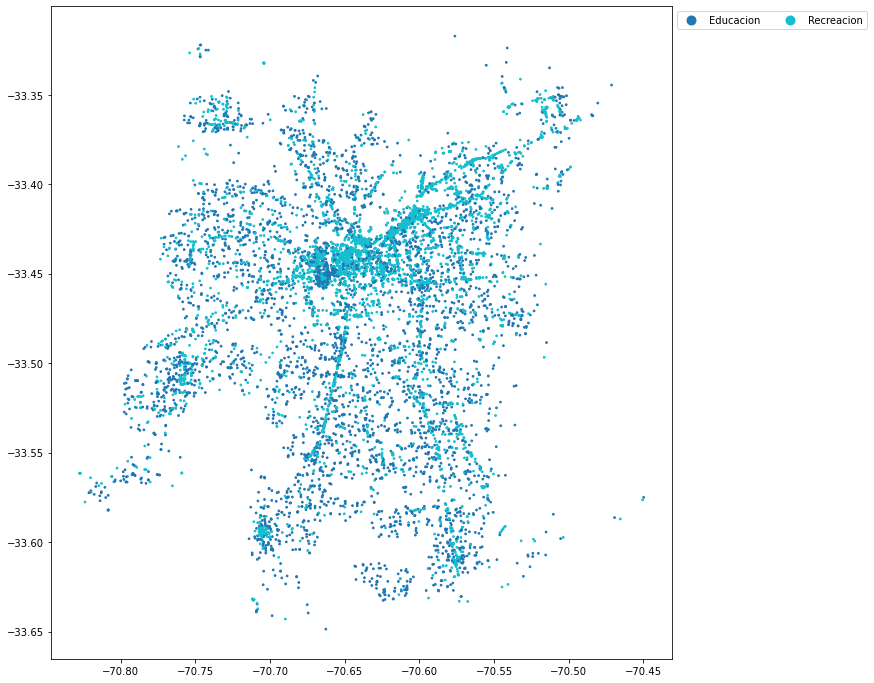

In [3]:
ax = amenity_gdf.plot(column='amenity', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

### Se lee el archivo con los shapes de distritos urbanos y comunas urbanas

In [4]:
urban_distritos = gpd.read_file('/home/jsepulveda/urban_distritos.shp')
urban_comunas = gpd.read_file('/home/jsepulveda/urban_comunas.shp')

### Se lee el archivo con las torres y sus ubicaciones

In [5]:
torres = pd.read_csv('/home/jsepulveda/torres_clean.csv')
torres['geometry'] = torres['geometry'].apply(wkt.loads)
torres_gdf = gpd.GeoDataFrame(torres, crs='epsg:4326')
torres_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,ALBER,POINT (-70.63374 -33.43539),PROVIDENCIA
2,ATICF,POINT (-70.60563 -33.42468),PROVIDENCIA
3,AVIUM,POINT (-70.62628 -33.44031),PROVIDENCIA
4,BARRO,POINT (-70.61785 -33.43059),PROVIDENCIA


### Se lee el archivo con la ruta de la L6 del Metro de Santiago

In [6]:
ruta = pd.read_csv('/home/jsepulveda/files/l6_route.csv')
ruta['geometry'] = ruta['geometry'].apply(wkt.loads)
ruta_gdf = gpd.GeoDataFrame(ruta, crs='epsg:4326')

### Se visualiza toda la información recopilada, el mapa de la RM dividido por comunas y distritos con los pois de recreación y eduación, las torres, y finalmente la Línea 6 del Metro de Santiago

In [7]:
import matplotlib.patheffects as path_effects

try:
    from adjustText import adjust_text
except:
    adjust_text = lambda *x,**y: x
    

text_style = dict(horizontalalignment='center', fontsize=13, fontweight='bold'
                 ,color='white', fontstretch='condensed')
text_effects = [path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()]    

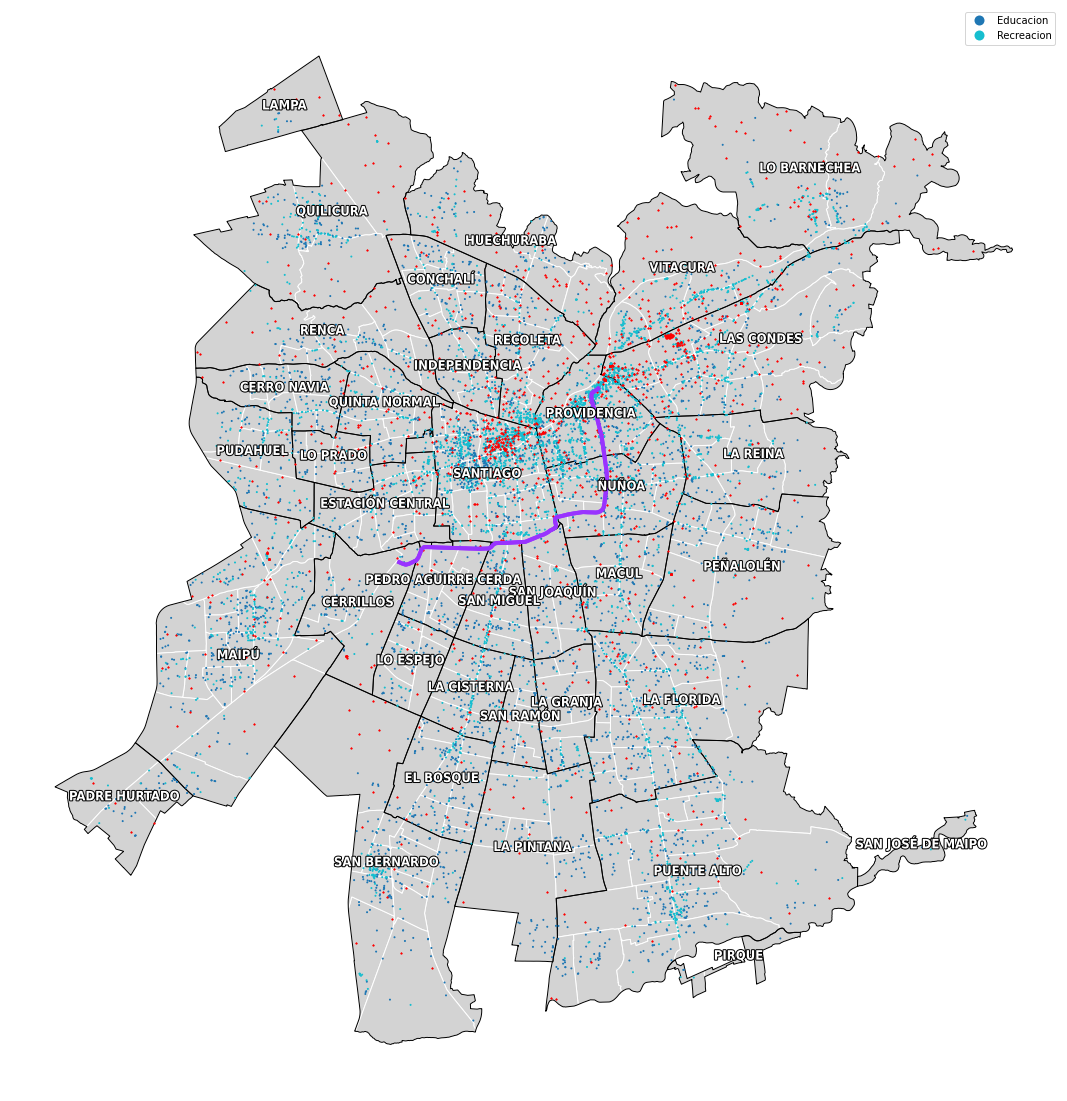

In [8]:
ax = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = urban_comunas.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = amenity_gdf.plot(column='amenity', figsize=(20,20),markersize=1,legend=True,ax=ax)
ax = torres_gdf.plot(marker='*', color='red',markersize=2,ax=ax)
ax = ruta_gdf.plot(color='#'+ ruta_gdf.route_color,linewidth=4,ax=ax)


texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

# ###############################################################

### Para analizar los elementos de mejor manera se procedera a estudiar las comunas que se ven afectadas por la Línea 6 del Metro

In [9]:
indexNames = urban_comunas[(urban_comunas['NOM_COMUNA'] != 'CERRILLOS') & (urban_comunas['NOM_COMUNA'] != 'PEDRO AGUIRRE CERDA') & (urban_comunas['NOM_COMUNA'] != 'SANTIAGO') & (urban_comunas['NOM_COMUNA'] != 'SAN MIGUEL') & (urban_comunas['NOM_COMUNA'] != 'SAN JOAQUÍN') & (urban_comunas['NOM_COMUNA'] != 'ÑUÑOA') & (urban_comunas['NOM_COMUNA'] != 'PROVIDENCIA')].index
urban_comunas.drop(indexNames, inplace=True)
urban_comunas.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,SHAPE_Leng,SHAPE_Area,geometry
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,0.127968,0.000850,"POLYGON ((-70.65563 -33.47835, -70.65571 -33.4..."
21,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13102,CERRILLOS,0.204707,0.001628,"POLYGON ((-70.71265 -33.48103, -70.71249 -33.4..."
24,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13120,ÑUÑOA,0.177127,0.001635,"POLYGON ((-70.57808 -33.43609, -70.57799 -33.4..."
32,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13129,SAN JOAQUÍN,0.134525,0.000965,"POLYGON ((-70.62322 -33.47457, -70.62321 -33.4..."
33,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13130,SAN MIGUEL,0.128936,0.000933,"POLYGON ((-70.64197 -33.47650, -70.64191 -33.4..."


### También los distritos...

In [10]:
indexNames = urban_distritos[(urban_distritos['NOM_COMUNA'] != 'CERRILLOS') & (urban_distritos['NOM_COMUNA'] != 'PEDRO AGUIRRE CERDA') & (urban_distritos['NOM_COMUNA'] != 'SANTIAGO') & (urban_distritos['NOM_COMUNA'] != 'SAN MIGUEL') & (urban_distritos['NOM_COMUNA'] != 'SAN JOAQUÍN') & (urban_distritos['NOM_COMUNA'] != 'ÑUÑOA') & (urban_distritos['NOM_COMUNA'] != 'PROVIDENCIA')].index
urban_distritos.drop(indexNames, inplace=True)
urban_distritos.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,COD_DISTRI,TIPO_DISTR,SHAPE_Leng,SHAPE_Area,geometry
58,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,2,URBANO,0.060496,0.000159,"POLYGON ((-70.65912 -33.48562, -70.65918 -33.4..."
59,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,6,URBANO,0.055696,0.000136,"POLYGON ((-70.68182 -33.47654, -70.68144 -33.4..."
60,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,1,URBANO,0.038523,0.000090,"POLYGON ((-70.67338 -33.48779, -70.67384 -33.4..."
61,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,3,URBANO,0.049509,0.000134,"POLYGON ((-70.66848 -33.48751, -70.66844 -33.4..."
62,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,5,URBANO,0.040292,0.000075,"POLYGON ((-70.67804 -33.49706, -70.67820 -33.4..."


### Las Torres ...

In [11]:
indexNames = torres_gdf[(torres_gdf['NOM_COMUNA'] != 'CERRILLOS') & (torres_gdf['NOM_COMUNA'] != 'PEDRO AGUIRRE CERDA') & (torres_gdf['NOM_COMUNA'] != 'SANTIAGO') & (torres_gdf['NOM_COMUNA'] != 'SAN MIGUEL') & (torres_gdf['NOM_COMUNA'] != 'SAN JOAQUÍN') & (torres_gdf['NOM_COMUNA'] != 'ÑUÑOA') & (torres_gdf['NOM_COMUNA'] != 'PROVIDENCIA')].index
torres_gdf.drop(indexNames, inplace=True)
torres_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,ALBER,POINT (-70.63374 -33.43539),PROVIDENCIA
2,ATICF,POINT (-70.60563 -33.42468),PROVIDENCIA
3,AVIUM,POINT (-70.62628 -33.44031),PROVIDENCIA
4,BARRO,POINT (-70.61785 -33.43059),PROVIDENCIA


### Y se utiliza sjoin para sacar los pois de educación correspondientes a esas comunas

In [12]:
urban_distritos = urban_distritos.set_crs("EPSG:4326")
comunas_l6_pois = gpd.sjoin(amenity_gdf,urban_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
comunas_l6_pois.head()

,Unnamed: 0,id,changeset,lat,timestamp,tags,version,lon,addr:city,addr:country,...,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,COD_DISTRI,TIPO_DISTR,SHAPE_Leng,SHAPE_Area
0,1,133663460,0.0,-33.446224,1342745401,"{""alt_name"":""Ciudadano Restaurant""}",7,-70.628490,NaN,NaN,...,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,6,URBANO,0.043244,0.000095
1,243,436055942,0.0,-33.444020,1246942797,NaN,1,-70.628784,NaN,NaN,...,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,6,URBANO,0.043244,0.000095
2,355,479358198,0.0,-33.438670,1477501264,NaN,9,-70.632130,NaN,NaN,...,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,6,URBANO,0.043244,0.000095
3,357,479397637,0.0,-33.441260,1525966301,NaN,9,-70.631226,NaN,NaN,...,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,6,URBANO,0.043244,0.000095
4,365,484737375,0.0,-33.440254,1252165529,NaN,1,-70.632910,NaN,NaN,...,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,6,URBANO,0.043244,0.000095


### Visualizamos nuevamente...

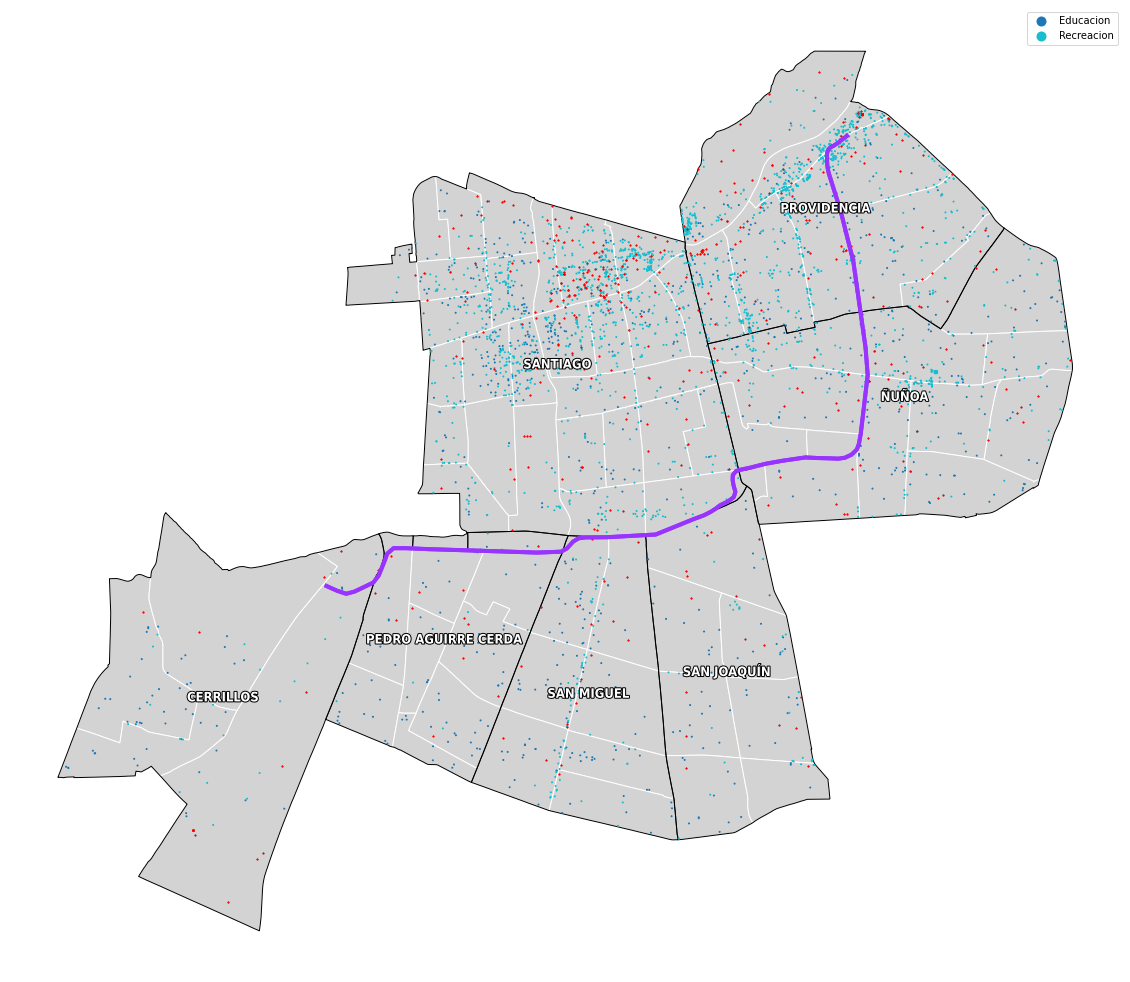

In [13]:
ax = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = urban_comunas.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = comunas_l6_pois.plot(column='amenity', figsize=(20,20),markersize=1,legend=True,ax=ax)
ax = torres_gdf.plot(marker='*', color='red',markersize=2,ax=ax)
ax = ruta_gdf.plot(color='#'+ ruta_gdf.route_color,linewidth=4,ax=ax)


texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

### Ahora podemos hacer analisis de densidades de pois o antenas por comuna y distrito

## Cerrillos

<ipython-input-59-59c0ddc83bdf>:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for distrito, centroid in zip(cerrillos_distritos['COD_DISTRI'], cerrillos_distritos.centroid):


Text(0.5, 1.0, 'Cantidad de POIs Recreación por Distrito')

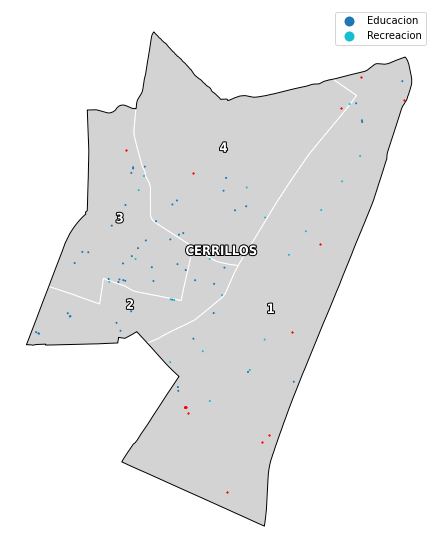

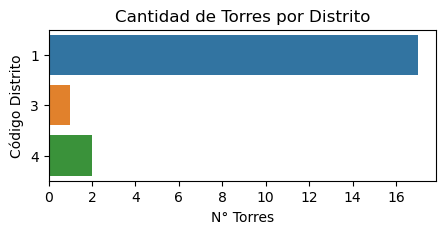

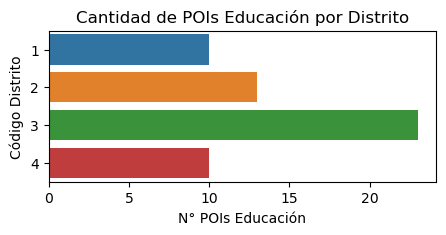

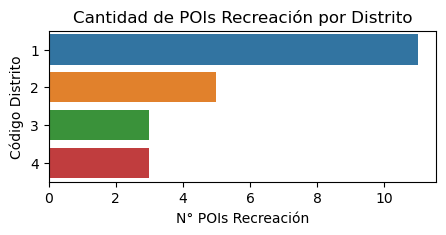

In [59]:
#Comuna
cerrillos = urban_comunas.copy()
indexNames = cerrillos[(cerrillos['NOM_COMUNA'] != 'CERRILLOS')].index
cerrillos.drop(indexNames, inplace =True)

#Distritos
cerrillos_distritos = urban_distritos.copy()
indexNames = cerrillos_distritos[(cerrillos_distritos['NOM_COMUNA'] != 'CERRILLOS')].index
cerrillos_distritos.drop(indexNames, inplace =True)

#Antenas
cerrillos_torres = torres_gdf.copy()
indexNames = cerrillos_torres[(cerrillos_torres['NOM_COMUNA'] != 'CERRILLOS')].index
cerrillos_torres.drop(indexNames, inplace =True)

#Pois
cerrillos_pois = comunas_l6_pois.copy()
indexNames = cerrillos_pois[(cerrillos_pois['NOM_COMUNA'] != 'CERRILLOS')].index
cerrillos_pois.drop(indexNames, inplace =True)

#Visualizacion
ax = cerrillos_distritos.plot(figsize=(10,10),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = cerrillos.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = cerrillos_pois.plot(column='amenity', figsize=(10,10),markersize=1,legend=True,ax=ax)
ax = cerrillos_torres.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(cerrillos['NOM_COMUNA'], cerrillos.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)

texts = []
for distrito, centroid in zip(cerrillos_distritos['COD_DISTRI'], cerrillos_distritos.centroid):
    t = ax.text(centroid.x, centroid.y, distrito, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');
####################################################
fig = plt.figure(dpi=100, figsize=(5,2))

cerrillos_distritos = cerrillos_distritos.set_crs("EPSG:4326")
cerrillos_torres_distrito = gpd.sjoin(cerrillos_torres,cerrillos_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = cerrillos_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()

ax1 = fig.gca()
sns.barplot(x=torres_por_distrito.rinhead, y=torres_por_distrito.COD_DISTRI, ax=ax1, orient="h")
ax1.set_ylabel("Código Distrito")
ax1.set_xlabel("N° Torres")
ax1.set_title("Cantidad de Torres por Distrito")
###################################################
fig2 = plt.figure(dpi=100, figsize=(5,2))

cerrillos_educacion = cerrillos_pois.copy()
indexNames = cerrillos_educacion[(cerrillos_educacion['amenity'] != 'Educacion')].index
cerrillos_educacion.drop(indexNames, inplace = True)
cerrillos_educacion_pois = cerrillos_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 

ax2 = fig2.gca()
sns.barplot(x=cerrillos_educacion_pois.amenity, y=cerrillos_educacion_pois.COD_DISTRI, ax=ax2, orient="h")
ax2.set_ylabel("Código Distrito")
ax2.set_xlabel("N° POIs Educación")
ax2.set_title("Cantidad de POIs Educación por Distrito")

##################################################
fig3 = plt.figure(dpi=100, figsize=(5,2))

cerrillos_recreacion = cerrillos_pois.copy()
indexNames = cerrillos_recreacion[(cerrillos_recreacion['amenity'] != 'Recreacion')].index
cerrillos_recreacion.drop(indexNames, inplace = True)
cerrillos_recreacion_pois = cerrillos_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()

ax3 = fig3.gca()
sns.barplot(x=cerrillos_recreacion_pois.amenity, y=cerrillos_recreacion_pois.COD_DISTRI, ax=ax3, orient="h")
ax3.set_ylabel("Código Distrito")
ax3.set_xlabel("N° POIs Recreación")
ax3.set_title("Cantidad de POIs Recreación por Distrito")



### Torres y Pois por distrito

In [55]:
cerrillos_distritos = cerrillos_distritos.set_crs("EPSG:4326")
cerrillos_torres_distrito = gpd.sjoin(cerrillos_torres,cerrillos_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = cerrillos_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()
torres_por_distrito.rename(columns={'rinhead':'Torres', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
torres_por_distrito.head()


,Código Distrito,Torres
0,1,17
1,3,1
2,4,2


In [56]:
cerrillos_educacion = cerrillos_pois.copy()
indexNames = cerrillos_educacion[(cerrillos_educacion['amenity'] != 'Educacion')].index
cerrillos_educacion.drop(indexNames, inplace = True)
cerrillos_educacion_pois = cerrillos_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 
cerrillos_educacion_pois.rename(columns={'amenity':'POIs Educacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
cerrillos_educacion_pois.head()

,Código Distrito,POIs Educacion
0,1,10
1,2,13
2,3,23
3,4,10


In [17]:
cerrillos_recreacion = cerrillos_pois.copy()
indexNames = cerrillos_recreacion[(cerrillos_recreacion['amenity'] != 'Recreacion')].index
cerrillos_recreacion.drop(indexNames, inplace = True)
cerrillos_recreacion_pois = cerrillos_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()
cerrillos_recreacion_pois.rename(columns={'amenity':'POIs Recreacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
cerrillos_recreacion_pois.head()

,Código Distrito,POIs Recreacion
0,1,11
1,2,5
2,3,3
3,4,3


## Pedro Aguirre Cerda

<ipython-input-60-addae2f76c1c>:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for distrito, centroid in zip(pac_distritos['COD_DISTRI'], pac_distritos.centroid):


Text(0.5, 1.0, 'Cantidad de POIs Recreación por Distrito')

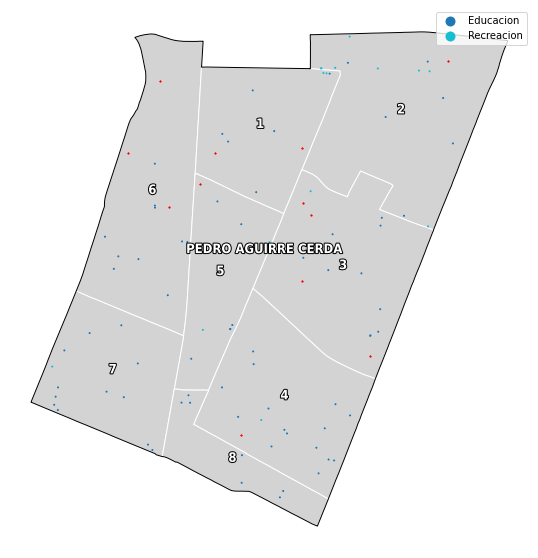

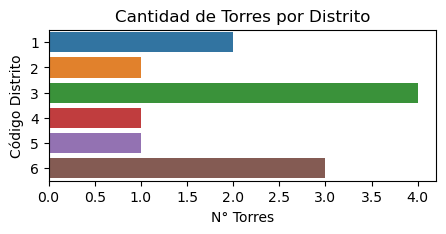

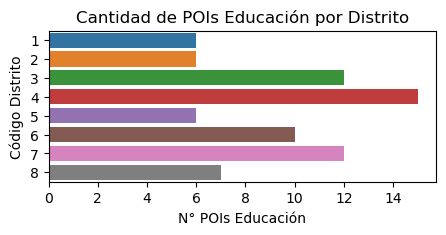

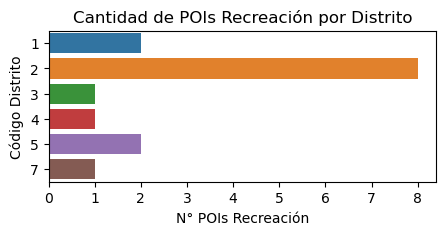

In [60]:
#Comuna
pac = urban_comunas.copy()
indexNames = pac[(pac['NOM_COMUNA'] != 'PEDRO AGUIRRE CERDA')].index
pac.drop(indexNames, inplace =True)

#Distritos
pac_distritos = urban_distritos.copy()
indexNames = pac_distritos[(pac_distritos['NOM_COMUNA'] != 'PEDRO AGUIRRE CERDA')].index
pac_distritos.drop(indexNames, inplace =True)

#Antenas
pac_torres = torres_gdf.copy()
indexNames = pac_torres[(pac_torres['NOM_COMUNA'] != 'PEDRO AGUIRRE CERDA')].index
pac_torres.drop(indexNames, inplace =True)

#Pois
pac_pois = comunas_l6_pois.copy()
indexNames = pac_pois[(pac_pois['NOM_COMUNA'] != 'PEDRO AGUIRRE CERDA')].index
pac_pois.drop(indexNames, inplace =True)

#Visualizacion
ax = pac_distritos.plot(figsize=(10,10),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = pac.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = pac_pois.plot(column='amenity', figsize=(10,10),markersize=1,legend=True,ax=ax)
ax = pac_torres.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(pac['NOM_COMUNA'], pac.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)

texts = []
for distrito, centroid in zip(pac_distritos['COD_DISTRI'], pac_distritos.centroid):
    t = ax.text(centroid.x, centroid.y, distrito, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

####################################################
fig = plt.figure(dpi=100, figsize=(5,2))

pac_distritos = pac_distritos.set_crs("EPSG:4326")
pac_torres_distrito = gpd.sjoin(pac_torres,pac_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = pac_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()

ax1 = fig.gca()
sns.barplot(x=torres_por_distrito.rinhead, y=torres_por_distrito.COD_DISTRI, ax=ax1, orient="h")
ax1.set_ylabel("Código Distrito")
ax1.set_xlabel("N° Torres")
ax1.set_title("Cantidad de Torres por Distrito")
###################################################
fig2 = plt.figure(dpi=100, figsize=(5,2))

pac_educacion = pac_pois.copy()
indexNames = pac_educacion[(pac_educacion['amenity'] != 'Educacion')].index
pac_educacion.drop(indexNames, inplace = True)
pac_educacion_pois = pac_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 

ax2 = fig2.gca()
sns.barplot(x=pac_educacion_pois.amenity, y=pac_educacion_pois.COD_DISTRI, ax=ax2, orient="h")
ax2.set_ylabel("Código Distrito")
ax2.set_xlabel("N° POIs Educación")
ax2.set_title("Cantidad de POIs Educación por Distrito")

##################################################
fig3 = plt.figure(dpi=100, figsize=(5,2))

pac_recreacion = pac_pois.copy()
indexNames = pac_recreacion[(pac_recreacion['amenity'] != 'Recreacion')].index
pac_recreacion.drop(indexNames, inplace = True)
pac_recreacion_pois = pac_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()

ax3 = fig3.gca()
sns.barplot(x=pac_recreacion_pois.amenity, y=pac_recreacion_pois.COD_DISTRI, ax=ax3, orient="h")
ax3.set_ylabel("Código Distrito")
ax3.set_xlabel("N° POIs Recreación")
ax3.set_title("Cantidad de POIs Recreación por Distrito")



### Torres y Pois por distrito

In [19]:
pac_distritos = pac_distritos.set_crs("EPSG:4326")
pac_torres_distrito = gpd.sjoin(pac_torres,pac_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = pac_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()
torres_por_distrito.rename(columns={'rinhead':'Torres', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(torres_por_distrito)

   Código Distrito  Torres
0                1       2
1                2       1
2                3       4
3                4       1
4                5       1
5                6       3


In [20]:
pac_educacion = pac_pois.copy()
indexNames = pac_educacion[(pac_educacion['amenity'] != 'Educacion')].index
pac_educacion.drop(indexNames, inplace = True)
pac_educacion_pois = pac_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 
pac_educacion_pois.rename(columns={'amenity':'POIs Educacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(pac_educacion_pois)

   Código Distrito  POIs Educacion
0                1               6
1                2               6
2                3              12
3                4              15
4                5               6
5                6              10
6                7              12
7                8               7


In [21]:
pac_recreacion = pac_pois.copy()
indexNames = pac_recreacion[(pac_recreacion['amenity'] != 'Recreacion')].index
pac_recreacion.drop(indexNames, inplace = True)
pac_recreacion_pois = pac_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()
pac_recreacion_pois.rename(columns={'amenity':'POIs Recreacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(pac_recreacion_pois)

   Código Distrito  POIs Recreacion
0                1                2
1                2                8
2                3                1
3                4                1
4                5                2
5                7                1


## San Miguel

<ipython-input-61-1e02711428fc>:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for distrito, centroid in zip(sm_distritos['COD_DISTRI'], sm_distritos.centroid):


Text(0.5, 1.0, 'Cantidad de POIs Recreación por Distrito')

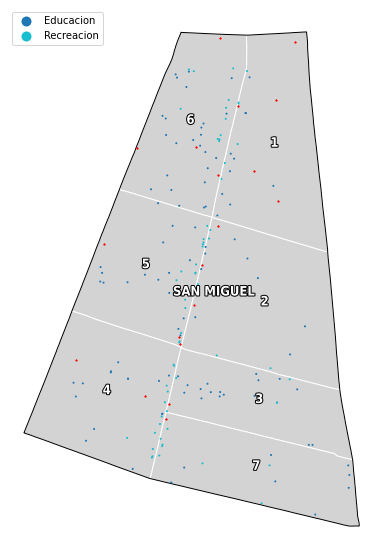

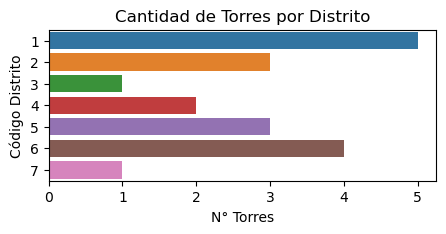

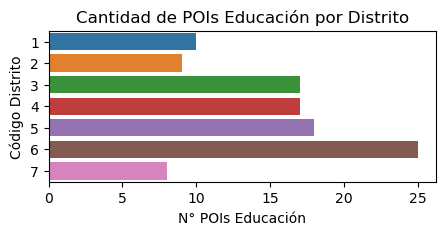

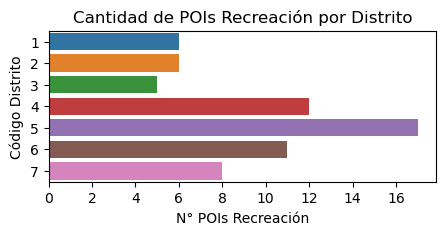

In [61]:
#Comuna
sm = urban_comunas.copy()
indexNames = sm[(sm['NOM_COMUNA'] != 'SAN MIGUEL')].index
sm.drop(indexNames, inplace =True)

#Distritos
sm_distritos = urban_distritos.copy()
indexNames = sm_distritos[(sm_distritos['NOM_COMUNA'] != 'SAN MIGUEL')].index
sm_distritos.drop(indexNames, inplace =True)

#Antenas
sm_torres = torres_gdf.copy()
indexNames = sm_torres[(sm_torres['NOM_COMUNA'] != 'SAN MIGUEL')].index
sm_torres.drop(indexNames, inplace =True)

#Pois
sm_pois = comunas_l6_pois.copy()
indexNames = sm_pois[(sm_pois['NOM_COMUNA'] != 'SAN MIGUEL')].index
sm_pois.drop(indexNames, inplace =True)

#Visualizacion
ax = sm_distritos.plot(figsize=(10,10),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = sm.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = sm_pois.plot(column='amenity', figsize=(10,10),markersize=1,legend=True,ax=ax)
ax = sm_torres.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(sm['NOM_COMUNA'], sm.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)

texts = []
for distrito, centroid in zip(sm_distritos['COD_DISTRI'], sm_distritos.centroid):
    t = ax.text(centroid.x, centroid.y, distrito, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

####################################################
fig = plt.figure(dpi=100, figsize=(5,2))

sm_distritos = sm_distritos.set_crs("EPSG:4326")
sm_torres_distrito = gpd.sjoin(sm_torres,sm_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = sm_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()

ax1 = fig.gca()
sns.barplot(x=torres_por_distrito.rinhead, y=torres_por_distrito.COD_DISTRI, ax=ax1, orient="h")
ax1.set_ylabel("Código Distrito")
ax1.set_xlabel("N° Torres")
ax1.set_title("Cantidad de Torres por Distrito")
###################################################
fig2 = plt.figure(dpi=100, figsize=(5,2))

sm_educacion = sm_pois.copy()
indexNames = sm_educacion[(sm_educacion['amenity'] != 'Educacion')].index
sm_educacion.drop(indexNames, inplace = True)
sm_educacion_pois = sm_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 

ax2 = fig2.gca()
sns.barplot(x=sm_educacion_pois.amenity, y=sm_educacion_pois.COD_DISTRI, ax=ax2, orient="h")
ax2.set_ylabel("Código Distrito")
ax2.set_xlabel("N° POIs Educación")
ax2.set_title("Cantidad de POIs Educación por Distrito")

##################################################
fig3 = plt.figure(dpi=100, figsize=(5,2))

sm_recreacion = sm_pois.copy()
indexNames = sm_recreacion[(sm_recreacion['amenity'] != 'Recreacion')].index
sm_recreacion.drop(indexNames, inplace = True)
sm_recreacion_pois = sm_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()

ax3 = fig3.gca()
sns.barplot(x=sm_recreacion_pois.amenity, y=sm_recreacion_pois.COD_DISTRI, ax=ax3, orient="h")
ax3.set_ylabel("Código Distrito")
ax3.set_xlabel("N° POIs Recreación")
ax3.set_title("Cantidad de POIs Recreación por Distrito")



### Torres y Pois por distrito


In [23]:
sm_distritos = sm_distritos.set_crs("EPSG:4326")
sm_torres_distrito = gpd.sjoin(sm_torres,sm_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = sm_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()
torres_por_distrito.rename(columns={'rinhead':'Torres', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(torres_por_distrito)

   Código Distrito  Torres
0                1       5
1                2       3
2                3       1
3                4       2
4                5       3
5                6       4
6                7       1


In [24]:
sm_educacion = sm_pois.copy()
indexNames = sm_educacion[(sm_educacion['amenity'] != 'Educacion')].index
sm_educacion.drop(indexNames, inplace = True)
sm_educacion_pois = sm_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 
sm_educacion_pois.rename(columns={'amenity':'POIs Educacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(sm_educacion_pois)

   Código Distrito  POIs Educacion
0                1              10
1                2               9
2                3              17
3                4              17
4                5              18
5                6              25
6                7               8


In [25]:
sm_recreacion = sm_pois.copy()
indexNames = sm_recreacion[(sm_recreacion['amenity'] != 'Recreacion')].index
sm_recreacion.drop(indexNames, inplace = True)
sm_recreacion_pois = sm_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()
sm_recreacion_pois.rename(columns={'amenity':'POIs Recreacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(sm_recreacion_pois)

   Código Distrito  POIs Recreacion
0                1                6
1                2                6
2                3                5
3                4               12
4                5               17
5                6               11
6                7                8


## San Joaquin

<ipython-input-62-8dc1fdac55c7>:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for distrito, centroid in zip(sj_distritos['COD_DISTRI'], sj_distritos.centroid):


Text(0.5, 1.0, 'Cantidad de POIs Recreación por Distrito')

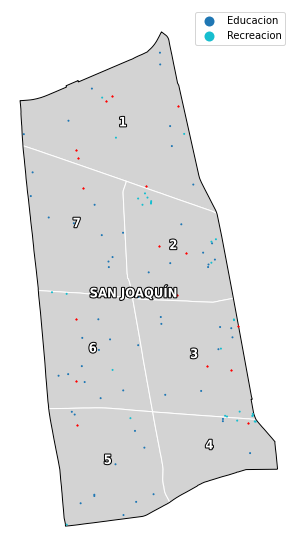

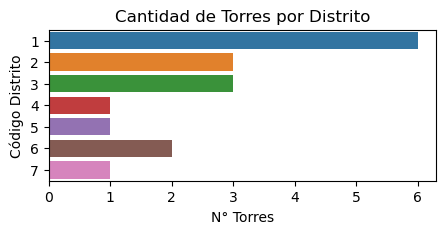

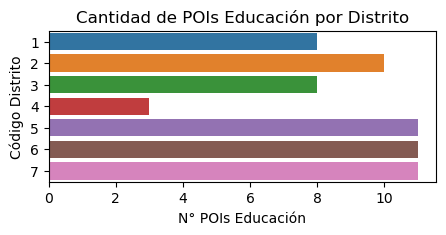

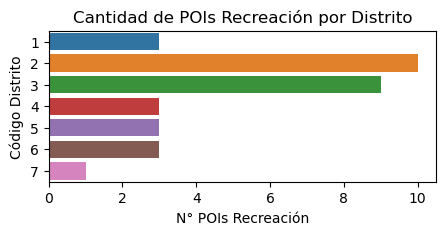

In [62]:
#Comuna
sj = urban_comunas.copy()
indexNames = sj[(sj['NOM_COMUNA'] != 'SAN JOAQUÍN')].index
sj.drop(indexNames, inplace =True)

#Distritos
sj_distritos = urban_distritos.copy()
indexNames = sj_distritos[(sj_distritos['NOM_COMUNA'] != 'SAN JOAQUÍN')].index
sj_distritos.drop(indexNames, inplace =True)

#Antenas
sj_torres = torres_gdf.copy()
indexNames = sj_torres[(sj_torres['NOM_COMUNA'] != 'SAN JOAQUÍN')].index
sj_torres.drop(indexNames, inplace =True)

#Pois
sj_pois = comunas_l6_pois.copy()
indexNames = sj_pois[(sj_pois['NOM_COMUNA'] != 'SAN JOAQUÍN')].index
sj_pois.drop(indexNames, inplace =True)

#Visualizacion
ax = sj_distritos.plot(figsize=(10,10),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = sj.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = sj_pois.plot(column='amenity', figsize=(10,10),markersize=1,legend=True,ax=ax)
ax = sj_torres.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(sj['NOM_COMUNA'], sj.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)

texts = []
for distrito, centroid in zip(sj_distritos['COD_DISTRI'], sj_distritos.centroid):
    t = ax.text(centroid.x, centroid.y, distrito, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

####################################################
fig = plt.figure(dpi=100, figsize=(5,2))

sj_distritos = sj_distritos.set_crs("EPSG:4326")
sj_torres_distrito = gpd.sjoin(sj_torres,sj_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = sj_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()

ax1 = fig.gca()
sns.barplot(x=torres_por_distrito.rinhead, y=torres_por_distrito.COD_DISTRI, ax=ax1, orient="h")
ax1.set_ylabel("Código Distrito")
ax1.set_xlabel("N° Torres")
ax1.set_title("Cantidad de Torres por Distrito")
###################################################
fig2 = plt.figure(dpi=100, figsize=(5,2))

sj_educacion = sj_pois.copy()
indexNames = sj_educacion[(sj_educacion['amenity'] != 'Educacion')].index
sj_educacion.drop(indexNames, inplace = True)
sj_educacion_pois = sj_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 

ax2 = fig2.gca()
sns.barplot(x=sj_educacion_pois.amenity, y=sj_educacion_pois.COD_DISTRI, ax=ax2, orient="h")
ax2.set_ylabel("Código Distrito")
ax2.set_xlabel("N° POIs Educación")
ax2.set_title("Cantidad de POIs Educación por Distrito")

##################################################
fig3 = plt.figure(dpi=100, figsize=(5,2))

sj_recreacion = sj_pois.copy()
indexNames = sj_recreacion[(sj_recreacion['amenity'] != 'Recreacion')].index
sj_recreacion.drop(indexNames, inplace = True)
sj_recreacion_pois = sj_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()

ax3 = fig3.gca()
sns.barplot(x=sj_recreacion_pois.amenity, y=sj_recreacion_pois.COD_DISTRI, ax=ax3, orient="h")
ax3.set_ylabel("Código Distrito")
ax3.set_xlabel("N° POIs Recreación")
ax3.set_title("Cantidad de POIs Recreación por Distrito")



### Torres y Pois por distrito

In [27]:
sj_distritos = sj_distritos.set_crs("EPSG:4326")
sj_torres_distrito = gpd.sjoin(sj_torres,sj_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = sj_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()
torres_por_distrito.rename(columns={'rinhead':'Torres', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(torres_por_distrito)

   Código Distrito  Torres
0                1       6
1                2       3
2                3       3
3                4       1
4                5       1
5                6       2
6                7       1


In [28]:
sj_educacion = sj_pois.copy()
indexNames = sj_educacion[(sj_educacion['amenity'] != 'Educacion')].index
sj_educacion.drop(indexNames, inplace = True)
sj_educacion_pois = sj_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 
sj_educacion_pois.rename(columns={'amenity':'POIs Educacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(sj_educacion_pois)

   Código Distrito  POIs Educacion
0                1               8
1                2              10
2                3               8
3                4               3
4                5              11
5                6              11
6                7              11


In [29]:
sj_recreacion = sj_pois.copy()
indexNames = sj_recreacion[(sj_recreacion['amenity'] != 'Recreacion')].index
sj_recreacion.drop(indexNames, inplace = True)
sj_recreacion_pois = sj_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()
sj_recreacion_pois.rename(columns={'amenity':'POIs Recreacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(sj_recreacion_pois)

   Código Distrito  POIs Recreacion
0                1                3
1                2               10
2                3                9
3                4                3
4                5                3
5                6                3
6                7                1


## Santiago

<ipython-input-64-54a7da4334a6>:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for distrito, centroid in zip(scl_distritos['COD_DISTRI'], scl_distritos.centroid):


Text(0.5, 1.0, 'Cantidad de POIs Recreación por Distrito')

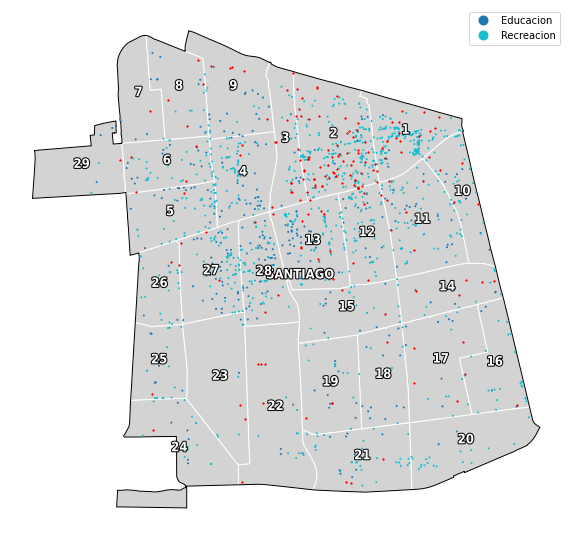

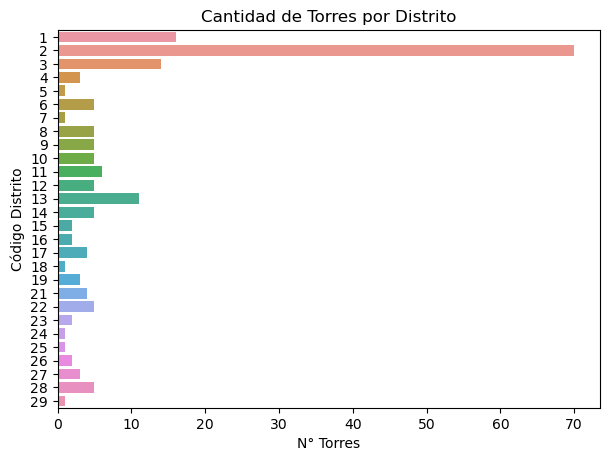

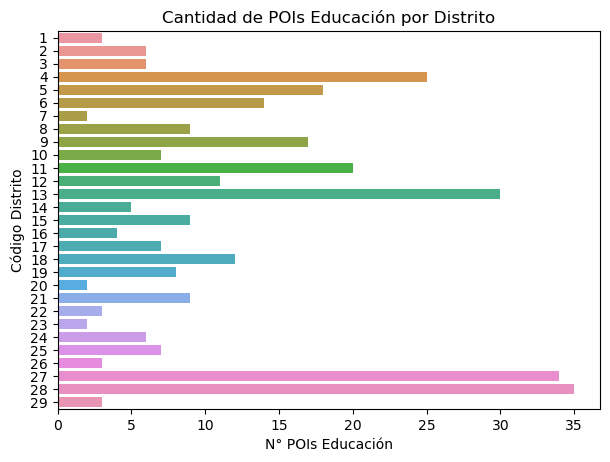

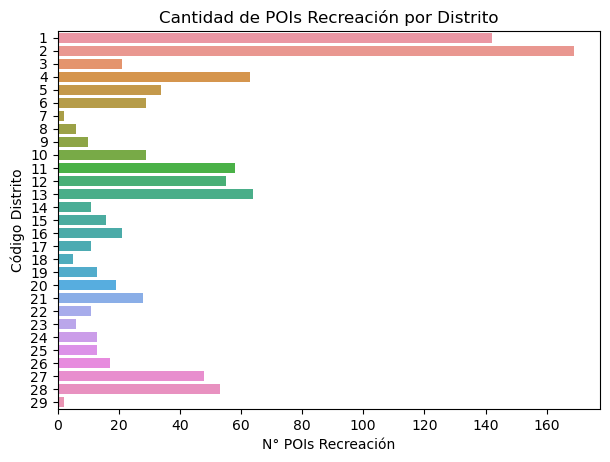

In [64]:
#Comuna
scl = urban_comunas.copy()
indexNames = scl[(scl['NOM_COMUNA'] != 'SANTIAGO')].index
scl.drop(indexNames, inplace =True)

#Distritos
scl_distritos = urban_distritos.copy()
indexNames = scl_distritos[(scl_distritos['NOM_COMUNA'] != 'SANTIAGO')].index
scl_distritos.drop(indexNames, inplace =True)

#Antenas
scl_torres = torres_gdf.copy()
indexNames = scl_torres[(scl_torres['NOM_COMUNA'] != 'SANTIAGO')].index
scl_torres.drop(indexNames, inplace =True)

#Pois
scl_pois = comunas_l6_pois.copy()
indexNames = scl_pois[(scl_pois['NOM_COMUNA'] != 'SANTIAGO')].index
scl_pois.drop(indexNames, inplace =True)

#Visualizacion
ax = scl_distritos.plot(figsize=(10,10),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = scl.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = scl_pois.plot(column='amenity', figsize=(10,10),markersize=1,legend=True,ax=ax)
ax = scl_torres.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(scl['NOM_COMUNA'], scl.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)

texts = []
for distrito, centroid in zip(scl_distritos['COD_DISTRI'], scl_distritos.centroid):
    t = ax.text(centroid.x, centroid.y, distrito, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');
####################################################
fig = plt.figure(dpi=100, figsize=(7,5))

scl_distritos = scl_distritos.set_crs("EPSG:4326")
scl_torres_distrito = gpd.sjoin(scl_torres,scl_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = scl_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()

ax1 = fig.gca()
sns.barplot(x=torres_por_distrito.rinhead, y=torres_por_distrito.COD_DISTRI, ax=ax1, orient="h")
ax1.set_ylabel("Código Distrito")
ax1.set_xlabel("N° Torres")
ax1.set_title("Cantidad de Torres por Distrito")
###################################################
fig2 = plt.figure(dpi=100, figsize=(7,5))

scl_educacion = scl_pois.copy()
indexNames = scl_educacion[(scl_educacion['amenity'] != 'Educacion')].index
scl_educacion.drop(indexNames, inplace = True)
scl_educacion_pois = scl_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 

ax2 = fig2.gca()
sns.barplot(x=scl_educacion_pois.amenity, y=scl_educacion_pois.COD_DISTRI, ax=ax2, orient="h")
ax2.set_ylabel("Código Distrito")
ax2.set_xlabel("N° POIs Educación")
ax2.set_title("Cantidad de POIs Educación por Distrito")

##################################################
fig3 = plt.figure(dpi=100, figsize=(7,5))

scl_recreacion = scl_pois.copy()
indexNames = scl_recreacion[(scl_recreacion['amenity'] != 'Recreacion')].index
scl_recreacion.drop(indexNames, inplace = True)
scl_recreacion_pois = scl_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()

ax3 = fig3.gca()
sns.barplot(x=scl_recreacion_pois.amenity, y=scl_recreacion_pois.COD_DISTRI, ax=ax3, orient="h")
ax3.set_ylabel("Código Distrito")
ax3.set_xlabel("N° POIs Recreación")
ax3.set_title("Cantidad de POIs Recreación por Distrito")

### Torres y Pois por distrito

In [31]:
scl_distritos = scl_distritos.set_crs("EPSG:4326")
scl_torres_distrito = gpd.sjoin(scl_torres,scl_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = scl_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()
torres_por_distrito.rename(columns={'rinhead':'Torres', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(torres_por_distrito)

    Código Distrito  Torres
0                 1      16
1                 2      70
2                 3      14
3                 4       3
4                 5       1
5                 6       5
6                 7       1
7                 8       5
8                 9       5
9                10       5
10               11       6
11               12       5
12               13      11
13               14       5
14               15       2
15               16       2
16               17       4
17               18       1
18               19       3
19               21       4
20               22       5
21               23       2
22               24       1
23               25       1
24               26       2
25               27       3
26               28       5
27               29       1


In [53]:
scl_educacion = scl_pois.copy()
indexNames = scl_educacion[(scl_educacion['amenity'] != 'Educacion')].index
scl_educacion.drop(indexNames, inplace = True)
scl_educacion_pois = scl_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 
scl_educacion_pois.rename(columns={'amenity':'POIs Educacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(scl_educacion_pois)

    Código Distrito  POIs Educacion
0                 1               3
1                 2               6
2                 3               6
3                 4              25
4                 5              18
5                 6              14
6                 7               2
7                 8               9
8                 9              17
9                10               7
10               11              20
11               12              11
12               13              30
13               14               5
14               15               9
15               16               4
16               17               7
17               18              12
18               19               8
19               20               2
20               21               9
21               22               3
22               23               2
23               24               6
24               25               7
25               26               3
26               27         

In [32]:
scl_recreacion = scl_pois.copy()
indexNames = scl_recreacion[(scl_recreacion['amenity'] != 'Recreacion')].index
scl_recreacion.drop(indexNames, inplace = True)
scl_recreacion_pois = scl_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()
scl_recreacion_pois.rename(columns={'amenity':'POIs Recreacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(scl_recreacion_pois)

    Código Distrito  POIs Recreacion
0                 1              142
1                 2              169
2                 3               21
3                 4               63
4                 5               34
5                 6               29
6                 7                2
7                 8                6
8                 9               10
9                10               29
10               11               58
11               12               55
12               13               64
13               14               11
14               15               16
15               16               21
16               17               11
17               18                5
18               19               13
19               20               19
20               21               28
21               22               11
22               23                6
23               24               13
24               25               13
25               26               17
2

## Ñuñoa

<ipython-input-66-709ebc84e679>:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for distrito, centroid in zip(ñuñoa_distritos['COD_DISTRI'], ñuñoa_distritos.centroid):


Text(0.5, 1.0, 'Cantidad de POIs Recreación por Distrito')

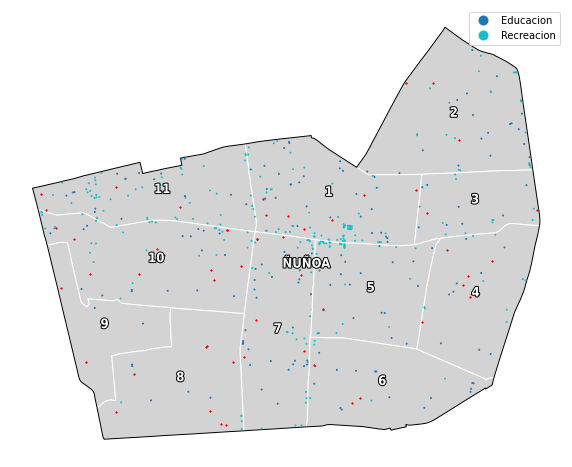

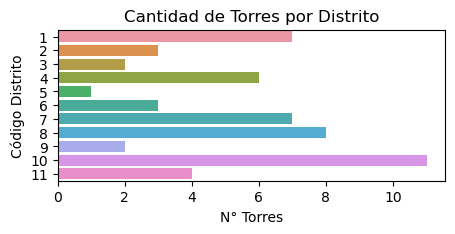

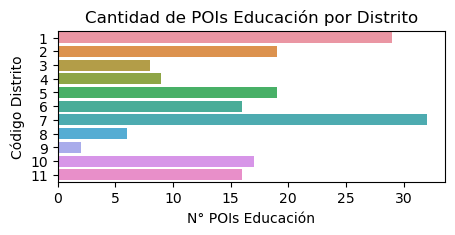

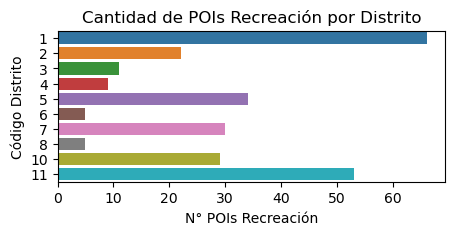

In [66]:
#Comuna
ñuñoa = urban_comunas.copy()
indexNames = ñuñoa[(ñuñoa['NOM_COMUNA'] != 'ÑUÑOA')].index
ñuñoa.drop(indexNames, inplace =True)

#Distritos
ñuñoa_distritos = urban_distritos.copy()
indexNames = ñuñoa_distritos[(ñuñoa_distritos['NOM_COMUNA'] != 'ÑUÑOA')].index
ñuñoa_distritos.drop(indexNames, inplace =True)

#Antenas
ñuñoa_torres = torres_gdf.copy()
indexNames = ñuñoa_torres[(ñuñoa_torres['NOM_COMUNA'] != 'ÑUÑOA')].index
ñuñoa_torres.drop(indexNames, inplace =True)

#Pois
ñuñoa_pois = comunas_l6_pois.copy()
indexNames = ñuñoa_pois[(ñuñoa_pois['NOM_COMUNA'] != 'ÑUÑOA')].index
ñuñoa_pois.drop(indexNames, inplace =True)

#Visualizacion
ax = ñuñoa_distritos.plot(figsize=(10,10),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = ñuñoa.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = ñuñoa_pois.plot(column='amenity', figsize=(10,10),markersize=1,legend=True,ax=ax)
ax = ñuñoa_torres.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(ñuñoa['NOM_COMUNA'], ñuñoa.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)

texts = []
for distrito, centroid in zip(ñuñoa_distritos['COD_DISTRI'], ñuñoa_distritos.centroid):
    t = ax.text(centroid.x, centroid.y, distrito, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');
####################################################
fig = plt.figure(dpi=100, figsize=(5,2))

ñuñoa_distritos = ñuñoa_distritos.set_crs("EPSG:4326")
ñuñoa_torres_distrito = gpd.sjoin(ñuñoa_torres,ñuñoa_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = ñuñoa_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()

ax1 = fig.gca()
sns.barplot(x=torres_por_distrito.rinhead, y=torres_por_distrito.COD_DISTRI, ax=ax1, orient="h")
ax1.set_ylabel("Código Distrito")
ax1.set_xlabel("N° Torres")
ax1.set_title("Cantidad de Torres por Distrito")
###################################################
fig2 = plt.figure(dpi=100, figsize=(5,2))

ñuñoa_educacion = ñuñoa_pois.copy()
indexNames = ñuñoa_educacion[(ñuñoa_educacion['amenity'] != 'Educacion')].index
ñuñoa_educacion.drop(indexNames, inplace = True)
ñuñoa_educacion_pois = ñuñoa_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 

ax2 = fig2.gca()
sns.barplot(x=ñuñoa_educacion_pois.amenity, y=ñuñoa_educacion_pois.COD_DISTRI, ax=ax2, orient="h")
ax2.set_ylabel("Código Distrito")
ax2.set_xlabel("N° POIs Educación")
ax2.set_title("Cantidad de POIs Educación por Distrito")

##################################################
fig3 = plt.figure(dpi=100, figsize=(5,2))

ñuñoa_recreacion = ñuñoa_pois.copy()
indexNames = ñuñoa_recreacion[(ñuñoa_recreacion['amenity'] != 'Recreacion')].index
ñuñoa_recreacion.drop(indexNames, inplace = True)
ñuñoa_recreacion_pois = ñuñoa_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()

ax3 = fig3.gca()
sns.barplot(x=ñuñoa_recreacion_pois.amenity, y=ñuñoa_recreacion_pois.COD_DISTRI, ax=ax3, orient="h")
ax3.set_ylabel("Código Distrito")
ax3.set_xlabel("N° POIs Recreación")
ax3.set_title("Cantidad de POIs Recreación por Distrito")

### Torres y Pois por distrito

In [34]:
ñuñoa_distritos = ñuñoa_distritos.set_crs("EPSG:4326")
ñuñoa_torres_distrito = gpd.sjoin(ñuñoa_torres,ñuñoa_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = ñuñoa_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()
torres_por_distrito.rename(columns={'rinhead':'Torres', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(torres_por_distrito)

    Código Distrito  Torres
0                 1       7
1                 2       3
2                 3       2
3                 4       6
4                 5       1
5                 6       3
6                 7       7
7                 8       8
8                 9       2
9                10      11
10               11       4


In [35]:
ñuñoa_educacion = ñuñoa_pois.copy()
indexNames = ñuñoa_educacion[(ñuñoa_educacion['amenity'] != 'Educacion')].index
ñuñoa_educacion.drop(indexNames, inplace = True)
ñuñoa_educacion_pois = ñuñoa_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 
ñuñoa_educacion_pois.rename(columns={'amenity':'POIs Educacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(ñuñoa_educacion_pois)

    Código Distrito  POIs Educacion
0                 1              29
1                 2              19
2                 3               8
3                 4               9
4                 5              19
5                 6              16
6                 7              32
7                 8               6
8                 9               2
9                10              17
10               11              16


In [36]:
ñuñoa_recreacion = ñuñoa_pois.copy()
indexNames = ñuñoa_recreacion[(ñuñoa_recreacion['amenity'] != 'Recreacion')].index
ñuñoa_recreacion.drop(indexNames, inplace = True)
ñuñoa_recreacion_pois = ñuñoa_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()
ñuñoa_recreacion_pois.rename(columns={'amenity':'POIs Recreacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(ñuñoa_recreacion_pois)

   Código Distrito  POIs Recreacion
0                1               66
1                2               22
2                3               11
3                4                9
4                5               34
5                6                5
6                7               30
7                8                5
8               10               29
9               11               53


## Providencia

<ipython-input-67-6a5a4ee6949f>:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for distrito, centroid in zip(providencia_distritos['COD_DISTRI'], providencia_distritos.centroid):


Text(0.5, 1.0, 'Cantidad de POIs Recreación por Distrito')

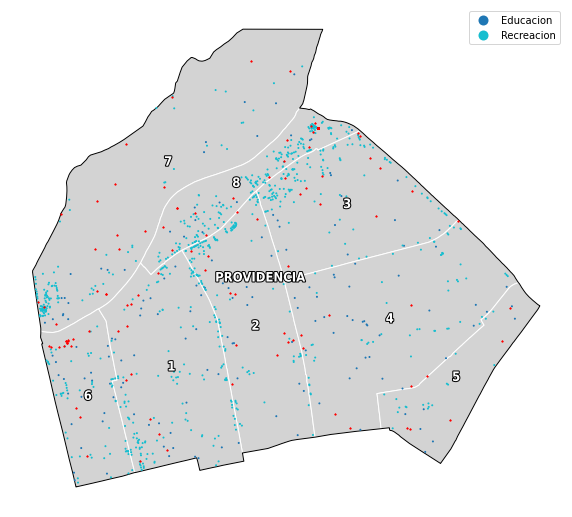

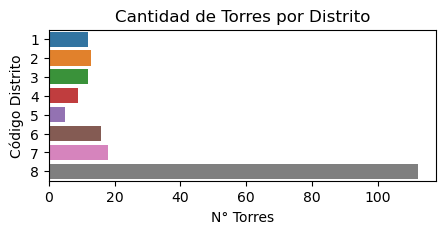

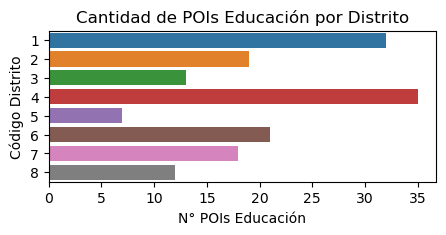

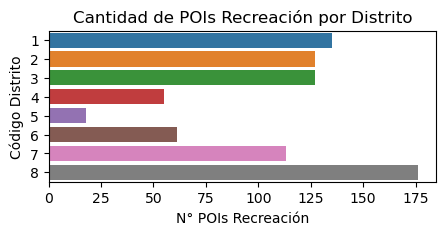

In [67]:
#Comuna
providencia = urban_comunas.copy()
indexNames = providencia[(providencia['NOM_COMUNA'] != 'PROVIDENCIA')].index
providencia.drop(indexNames, inplace =True)

#Distritos
providencia_distritos = urban_distritos.copy()
indexNames = providencia_distritos[(providencia_distritos['NOM_COMUNA'] != 'PROVIDENCIA')].index
providencia_distritos.drop(indexNames, inplace =True)

#Antenas
providencia_torres = torres_gdf.copy()
indexNames = providencia_torres[(providencia_torres['NOM_COMUNA'] != 'PROVIDENCIA')].index
providencia_torres.drop(indexNames, inplace =True)

#Pois
providencia_pois = comunas_l6_pois.copy()
indexNames = providencia_pois[(providencia_pois['NOM_COMUNA'] != 'PROVIDENCIA')].index
providencia_pois.drop(indexNames, inplace =True)

#Visualizacion
ax = providencia_distritos.plot(figsize=(10,10),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = providencia.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = providencia_pois.plot(column='amenity', figsize=(10,10),markersize=1,legend=True,ax=ax)
ax = providencia_torres.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(providencia['NOM_COMUNA'], providencia.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)

texts = []
for distrito, centroid in zip(providencia_distritos['COD_DISTRI'], providencia_distritos.centroid):
    t = ax.text(centroid.x, centroid.y, distrito, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

####################################################
fig = plt.figure(dpi=100, figsize=(5,2))

providencia_distritos = providencia_distritos.set_crs("EPSG:4326")
providencia_torres_distrito = gpd.sjoin(providencia_torres,providencia_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = providencia_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()

ax1 = fig.gca()
sns.barplot(x=torres_por_distrito.rinhead, y=torres_por_distrito.COD_DISTRI, ax=ax1, orient="h")
ax1.set_ylabel("Código Distrito")
ax1.set_xlabel("N° Torres")
ax1.set_title("Cantidad de Torres por Distrito")
###################################################
fig2 = plt.figure(dpi=100, figsize=(5,2))

providencia_educacion = providencia_pois.copy()
indexNames = providencia_educacion[(providencia_educacion['amenity'] != 'Educacion')].index
providencia_educacion.drop(indexNames, inplace = True)
providencia_educacion_pois = providencia_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 

ax2 = fig2.gca()
sns.barplot(x=providencia_educacion_pois.amenity, y=providencia_educacion_pois.COD_DISTRI, ax=ax2, orient="h")
ax2.set_ylabel("Código Distrito")
ax2.set_xlabel("N° POIs Educación")
ax2.set_title("Cantidad de POIs Educación por Distrito")

##################################################
fig3 = plt.figure(dpi=100, figsize=(5,2))

providencia_recreacion = providencia_pois.copy()
indexNames = providencia_recreacion[(providencia_recreacion['amenity'] != 'Recreacion')].index
providencia_recreacion.drop(indexNames, inplace = True)
providencia_recreacion_pois = providencia_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()

ax3 = fig3.gca()
sns.barplot(x=providencia_recreacion_pois.amenity, y=providencia_recreacion_pois.COD_DISTRI, ax=ax3, orient="h")
ax3.set_ylabel("Código Distrito")
ax3.set_xlabel("N° POIs Recreación")
ax3.set_title("Cantidad de POIs Recreación por Distrito")

### Torres y Pois por distrito

In [60]:
providencia_distritos = providencia_distritos.set_crs("EPSG:4326")
providencia_torres_distrito = gpd.sjoin(providencia_torres,providencia_distritos, how='inner', op = 'intersects').reset_index().drop(['index_right','index'], axis = 1)
torres_por_distrito = providencia_torres_distrito.groupby(['COD_DISTRI']).agg({'rinhead':'count'}).reset_index()
torres_por_distrito.rename(columns={'rinhead':'Torres', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(torres_por_distrito)

   Código Distrito  Torres
0                1      12
1                2      13
2                3      12
3                4       9
4                5       5
5                6      16
6                7      18
7                8     112


In [61]:
providencia_educacion = providencia_pois.copy()
indexNames = providencia_educacion[(providencia_educacion['amenity'] != 'Educacion')].index
providencia_educacion.drop(indexNames, inplace = True)
providencia_educacion_pois = providencia_educacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index() 
providencia_educacion_pois.rename(columns={'amenity':'POIs Educacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(providencia_educacion_pois)

   Código Distrito  POIs Educacion
0                1              32
1                2              19
2                3              13
3                4              35
4                5               7
5                6              21
6                7              18
7                8              12


In [41]:
providencia_recreacion = providencia_pois.copy()
indexNames = providencia_recreacion[(providencia_recreacion['amenity'] != 'Recreacion')].index
providencia_recreacion.drop(indexNames, inplace = True)
providencia_recreacion_pois = providencia_recreacion.groupby(['COD_DISTRI']).agg({'amenity':'count'}).reset_index()
providencia_recreacion_pois.rename(columns={'amenity':'POIs Recreacion', 'COD_DISTRI': 'Código Distrito'}, inplace = True)
print(providencia_recreacion_pois)

   Código Distrito  POIs Recreacion
0                1              135
1                2              127
2                3              127
3                4               55
4                5               18
5                6               61
6                7              113
7                8              176


# ################################################################


### Descubriendo las torres cercanas a la Línea 6 del metro

In [14]:
ruta_gdf.drop(['Unnamed: 0'], axis = 1)

,shape_id,geometry,trip_id,route_id,service_id,direction_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,L6-I_V40,"LINESTRING (-70.69542 -33.48338, -70.69335 -33...",L6-I-L_V40-M01,L6_V40,L_V40,0,M,L6,Línea6 (Cerrillos - Los Leones),NaN,1,NaN,9933FF,0
1,L6-R_V40,"LINESTRING (-70.60817 -33.42077, -70.60981 -33...",L6-R-L_V40-M01,L6_V40,L_V40,1,M,L6,Línea6 (Cerrillos - Los Leones),NaN,1,NaN,9933FF,0


In [15]:
ruta_buffer = ruta_gdf.copy()
ruta_buffer = ruta_buffer.set_crs("EPSG:4326")
ruta_buffer.geometry = ruta_buffer['geometry'].buffer(0.001)



<ipython-input-15-350296c7360b>:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ruta_buffer.geometry = ruta_buffer['geometry'].buffer(0.001)


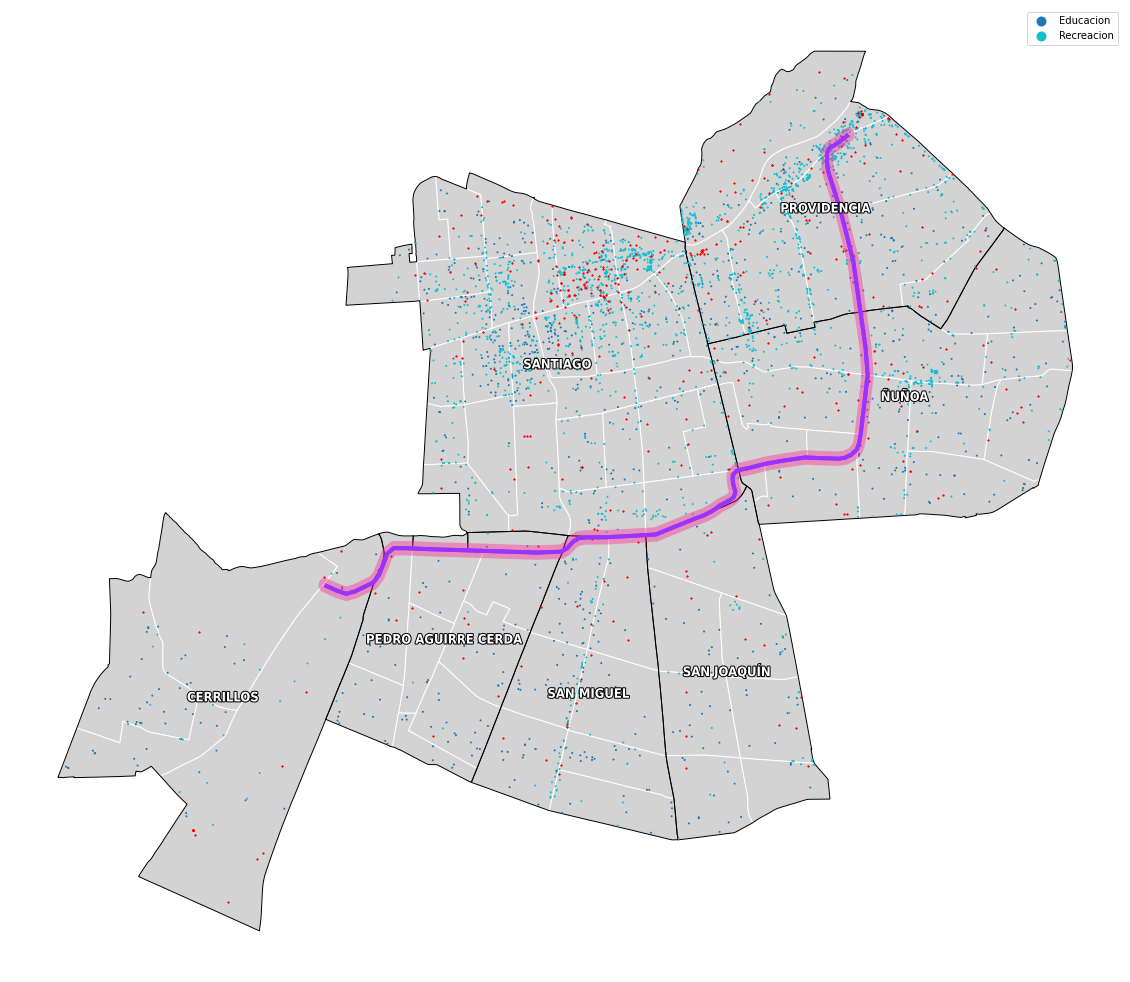

In [16]:
ax = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = urban_comunas.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = comunas_l6_pois.plot(column='amenity', figsize=(20,20),markersize=1,legend=True,ax=ax)
ax = torres_gdf.plot(marker='*', color='red',markersize=2,ax=ax)
ax = ruta_buffer.plot(color = '#FF339940', linewidth = 1, ax=ax)
ax = ruta_gdf.plot(color='#'+ ruta_gdf.route_color,linewidth=4,ax=ax)



texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

In [17]:
ruta_buffer = ruta_gdf.copy()
ruta_buffer = ruta_buffer.set_crs("EPSG:4326")
ruta_buffer.geometry = ruta_buffer['geometry'].buffer(0.01)

<ipython-input-17-3f4212cec20f>:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ruta_buffer.geometry = ruta_buffer['geometry'].buffer(0.01)


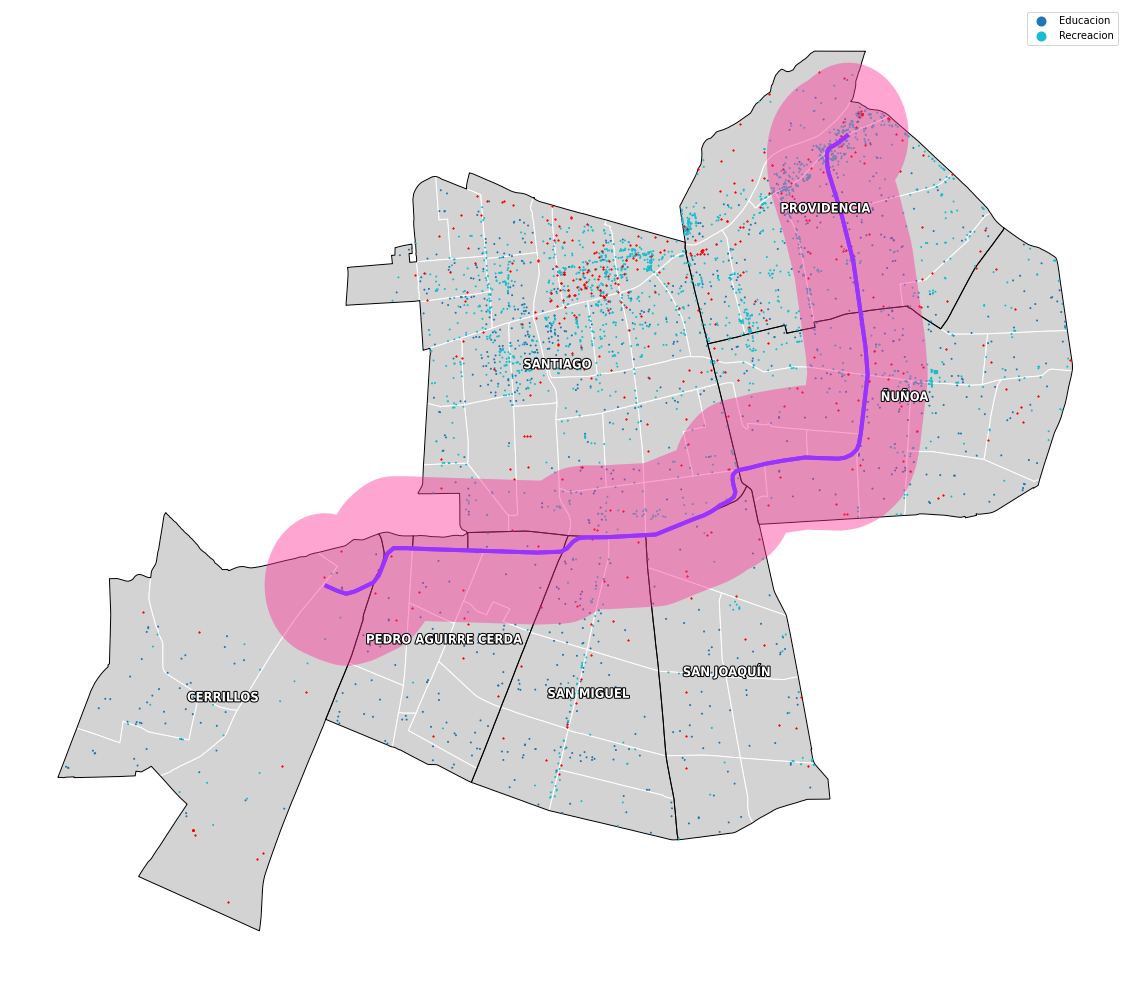

In [18]:
ax = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = urban_comunas.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = comunas_l6_pois.plot(column='amenity', figsize=(20,20),markersize=1,legend=True,ax=ax)
ax = torres_gdf.plot(marker='*', color='red',markersize=2,ax=ax)
ax = ruta_buffer.plot(color = '#FF339940', linewidth = 1, ax=ax)
ax = ruta_gdf.plot(color='#'+ ruta_gdf.route_color,linewidth=4,ax=ax)



texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

In [21]:
torres_buffer = torres_gdf.copy()
torres_buffer = torres_buffer.set_crs("EPSG:4326")
torres_buffer.geometry = torres_buffer['geometry'].buffer(0.01)

<ipython-input-21-872c8b5bd1e6>:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  torres_buffer.geometry = torres_buffer['geometry'].buffer(0.01)


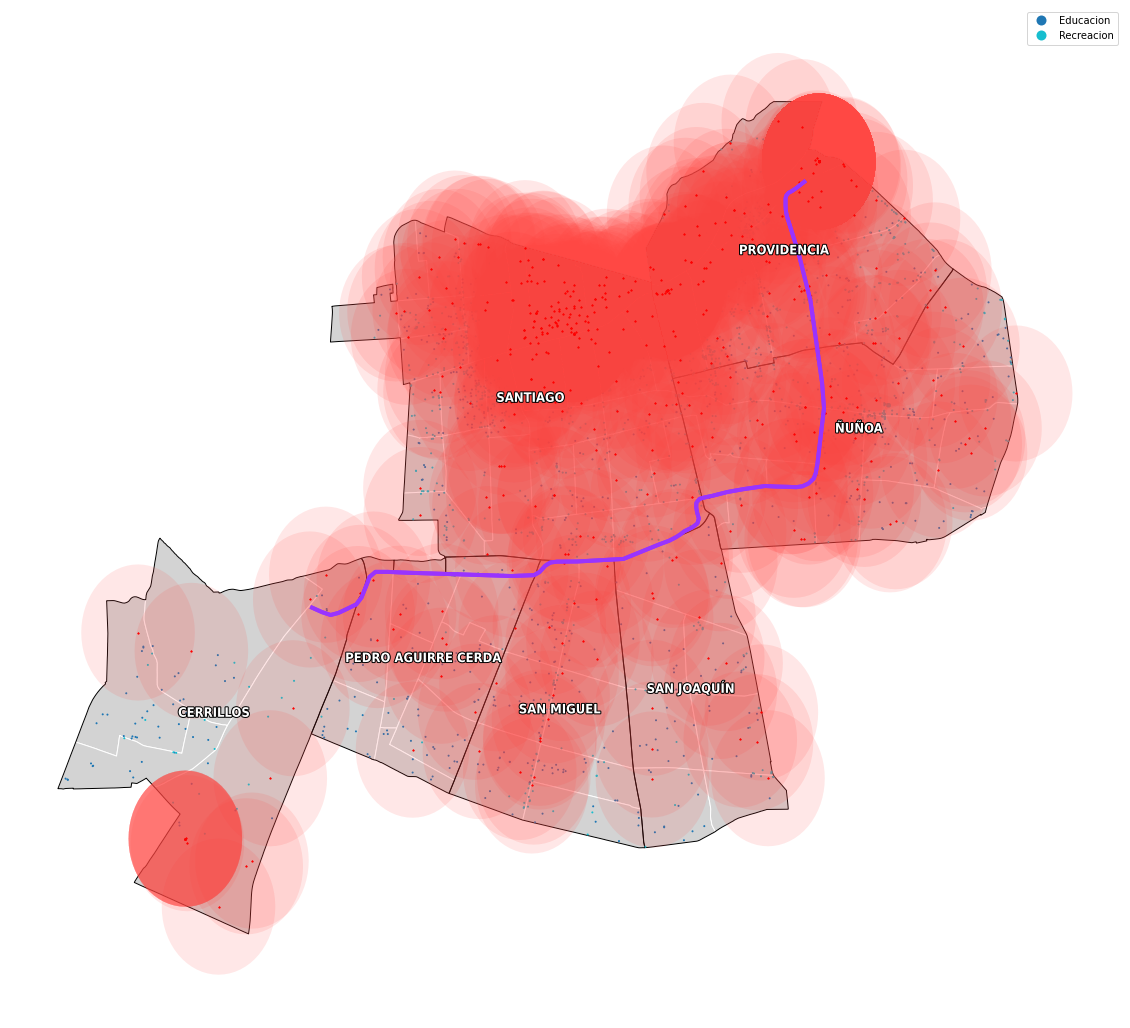

In [30]:
ax = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = urban_comunas.plot(linewidth=1, edgecolor='black', facecolor="none", ax=ax)
ax = comunas_l6_pois.plot(column='amenity', figsize=(20,20),markersize=1,legend=True,ax=ax)
ax = torres_buffer.plot(color='#FF444020',linewidth=1,ax=ax)
ax = torres_gdf.plot(marker='*', color='red',markersize=2,ax=ax)

ax = ruta_gdf.plot(color='#'+ ruta_gdf.route_color,linewidth=4,ax=ax)



texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');